In [1]:
import os
os.chdir('/cluster/home/bdayan/girgs/benji_src/notebooks/')
os.environ['DATA_PATH'] = '/cluster/home/bdayan/girgs/FE_FB_chunglu_with_tau/'

import pandas as pd
pd.set_option('display.max_rows', 100)

import scipy
import seaborn as sns
import sys
sys.path.append('../nemo-eva/src/')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df_clean = pd.read_csv(os.environ['DATA_PATH'] + '3-cleaned_features/results.csv')
df_clean.Info = df_clean.Info.apply(lambda temp: {'Info': temp} if '|' not in temp else {key: eval(var) for key, var in [x.split('=') for x in temp.split('|')]})
df_real = df_clean.loc[df_clean.Model == 'real-world']
df_clean['alpha'] = df_clean.Info.apply(lambda x: float(x['alpha']) if 'alpha' in x else 1/float(x['t']) if 't' in x else None)
df_clean.shape


# df_raw = pd.read_csv(os.environ['DATA_PATH'] + '2-features/results.csv')
# import feature_cleaner
# graph_dicts = df_raw.to_dict('records')
# fc = feature_cleaner.FeatureCleaner(graph_dicts)
# fc.resultspath = './temp/results.csv'
# fc._stagepath = './temp/'
# fc.resultspath

(3162, 274)

In [3]:
df_clean.Graph.unique()

array(['socfb-Colgate88', 'socfb-Brown11', 'socfb-Indiana',
       'socfb-Swarthmore42', 'socfb-UCLA26', 'socfb-Haverford76',
       'socfb-UCF52', 'socfb-UMass92', 'socfb-UC64', 'socfb-MIT8',
       'socfb-Vassar85', 'socfb-Vanderbilt48', 'socfb-Rice31',
       'socfb-UCSB37', 'socfb-Stanford3', 'socfb-UIllinois',
       'socfb-Oklahoma97', 'socfb-Tulane29', 'socfb-Yale4', 'socfb-UCLA',
       'socfb-BU10', 'socfb-JMU79', 'socfb-UVA16', 'socfb-Middlebury45',
       'socfb-USF51', 'socfb-Harvard1', 'socfb-Emory27', 'socfb-Auburn71',
       'socfb-Tufts18', 'socfb-Simmons81', 'socfb-Santa74',
       'socfb-WashU32', 'socfb-Tennessee95', 'socfb-Baylor93',
       'socfb-FSU53', 'socfb-Trinity100', 'socfb-Mich67', 'socfb-GWU54',
       'socfb-MIT', 'socfb-Lehigh96', 'socfb-Wellesley22',
       'socfb-UChicago30', 'socfb-Rochester38', 'socfb-Bowdoin47',
       'socfb-Reed98', 'socfb-Cornell5', 'socfb-Virginia63',
       'socfb-Duke14', 'socfb-Wisconsin87', 'socfb-BC17', 'socfb-UCSC68',
    

In [14]:
fc.execute()


['Partition.Communities.Dispersion.Coefficient Of Variation',
 'Partition.Communities.Dispersion.Coefficient Of Variation (Rank)',
 'Partition.Communities.Dispersion.Standard Deviation',
 'Partition.Communities.Dispersion.Standard Deviation (Rank)',
 'Partition.Communities.Dispersion.Uncorrected Coefficient Of Variation',
 'Partition.Communities.Dispersion.Uncorrected Coefficient Of Variation (Rank)',
 'Partition.Communities.Dispersion.Uncorrected Standard Deviation',
 'Partition.Communities.Dispersion.Uncorrected Standard Deviation (Rank)',
 'Partition.Communities.Dispersion.Uncorrected Variance',
 'Partition.Communities.Dispersion.Uncorrected Variance (Rank)',
 'Partition.Communities.Dispersion.Variance',
 'Partition.Communities.Dispersion.Variance (Rank)',
 'Partition.Communities.Location.1st Quartile',
 'Partition.Communities.Location.3rd Quartile',
 'Partition.Communities.Location.Arithmetic Mean',
 'Partition.Communities.Location.Arithmetic Mean (Rank)',
 'Partition.Communities.L

In [15]:
df_clean.loc[df_clean.Model.isin(['1d-girg', '3d-girg', '4d-girg', '5d-girg', 'real-world']), ['Graph', 'Model', 'Type', 'Nodes', 'Edges', 'alpha', 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean', 'Centrality.Degree.Location.Arithmetic Mean']].sort_values(['Graph', 'Model'])

,Partition.Communities.Dispersion.Coefficient Of Variation,Partition.Communities.Dispersion.Coefficient Of Variation (Rank),Partition.Communities.Dispersion.Standard Deviation,Partition.Communities.Dispersion.Standard Deviation (Rank),Partition.Communities.Dispersion.Uncorrected Coefficient Of Variation,Partition.Communities.Dispersion.Uncorrected Coefficient Of Variation (Rank),Partition.Communities.Dispersion.Uncorrected Standard Deviation,Partition.Communities.Dispersion.Uncorrected Standard Deviation (Rank),Partition.Communities.Dispersion.Uncorrected Variance,Partition.Communities.Dispersion.Uncorrected Variance (Rank),...,Partition.Communities.Location.Interquartile Mean,Partition.Communities.Location.Max,Partition.Communities.Location.Median,Partition.Communities.Location.Mid-Range,Partition.Communities.Location.Min,Partition.Communities.Location.Quadratic Mean,Partition.Communities.Properties.Size,Partition.Communities.Shape.Kurtosis,Partition.Communities.Shape.Skewness M,Partition.Communities.Shape.Skewness YP
0,0.952716,0.554700,965.736679,3.605551,0.912156,0.531085,924.622476,3.452053,854926.722222,11.916667,...,716.833333,2779.0,496.5,1449.0,119.0,1372.022898,12,-1.373822,0.628231,1.606546
1,0.200793,0.544331,305.305468,2.449490,0.187824,0.509175,285.587115,2.291288,81560.000000,5.250000,...,1488.000000,2101.0,1492.0,1625.5,1150.0,1547.087667,8,-1.005650,0.554886,0.280047
2,0.412995,0.550482,502.366666,3.027650,0.391801,0.522233,476.586865,2.872281,227135.040000,8.250000,...,1231.000000,1875.0,1243.5,1093.0,311.0,1306.431782,10,-1.254909,-0.249472,-0.161834
3,0.405332,0.552771,448.223118,3.316625,0.386469,0.527046,427.363975,3.162278,182639.966942,10.000000,...,1085.428571,1887.0,1058.0,1181.0,475.0,1185.526810,11,-1.105635,0.212019,0.320052
4,0.329577,0.534522,660.362224,1.870829,0.300861,0.487950,602.825477,1.707825,363398.555556,2.916667,...,2051.750000,2688.0,2017.5,1907.5,1127.0,2092.385879,6,-2.046420,-0.103931,-0.062844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2670,0.382832,0.571887,214.761719,15.440955,0.379204,0.566466,212.726017,15.294591,45252.358135,233.924528,...,553.777778,1330.0,568.0,777.0,224.0,599.960156,53,1.449740,0.745954,-0.098046
2671,0.177846,0.560112,330.482980,4.760952,0.172199,0.542326,319.988769,4.609772,102392.812500,21.250000,...,1882.500000,2443.0,1872.0,1897.0,1351.0,1885.599606,16,-1.341475,-0.055868,-0.124817
2672,0.194433,0.567646,199.340816,8.514693,0.191051,0.557773,195.873755,8.366600,38366.527943,70.000000,...,1016.866667,1491.0,998.0,1076.0,661.0,1043.784659,29,0.121775,0.371173,0.409972
2673,0.237418,0.557773,504.207898,4.183300,0.228782,0.537484,485.866888,4.031129,236066.632653,16.250000,...,2081.250000,3079.0,2157.5,2195.0,1311.0,2178.584173,14,-0.934767,0.258454,-0.201023


In [163]:
df_clean.loc[df_clean.alpha > 30.0, ['Graph', 'Model', 'Type', 'Nodes', 'Edges', 'alpha', 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean', 'Centrality.Degree.Location.Arithmetic Mean']]

,Graph,Model,Type,Nodes,Edges,alpha,Centrality.ClusteringCoefficient.Location.Arithmetic Mean,Centrality.Degree.Location.Arithmetic Mean
10,socfb-Bowdoin47,5d-girg,socfb,2250,85547,100.0,0.250289,76.041778
43,socfb-Reed98,5d-girg,socfb,962,19151,100.0,0.261632,39.814969
54,socfb-Rochester38,5d-girg,socfb,4561,163040,100.0,0.249215,71.493094
109,socfb-Haverford76,5d-girg,socfb,1446,60012,100.0,0.244440,83.004149
120,socfb-UC61,5d-girg,socfb,13736,446291,100.0,0.250456,64.981217
153,socfb-Brandeis99,5d-girg,socfb,3887,139236,100.0,0.251550,71.641883
164,socfb-Lehigh96,5d-girg,socfb,5073,199794,100.0,0.246639,78.767593
197,socfb-UC64,5d-girg,socfb,6810,156986,100.0,0.249167,46.104552
241,socfb-Wellesley22,5d-girg,socfb,2970,95891,100.0,0.260702,64.573064
318,socfb-Amherst41,5d-girg,socfb,2235,91877,100.0,0.247088,82.216555


In [176]:
list(df_clean.loc[df_clean.alpha < 1.25, 'Graph'].unique())

['socfb-Brown11',
 'socfb-NotreDame57',
 'socfb-Northeastern19',
 'socfb-NYU9',
 'socfb-nips-ego',
 'socfb-BU10',
 'socfb-UNC28',
 'socfb-Howard90']

In [182]:
df_clean.loc[df_clean.Graph.isin(['socfb-Brown11',
 'socfb-NotreDame57',
 'socfb-Northeastern19',
 'socfb-NYU9',
 'socfb-nips-ego',
 'socfb-BU10',
 'socfb-UNC28',
 'socfb-Howard90'])].sort_values(['Graph', 'Model']).loc[:, ['Graph', 'Model', 'Nodes', 'Edges', 'alpha', 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean']]

,Graph,Model,Nodes,Edges,alpha,Centrality.ClusteringCoefficient.Location.Arithmetic Mean
655,socfb-BU10,1d-girg,19666,636893,1.246227,0.189894
656,socfb-BU10,2d-girg,19666,637763,1.289283,0.189614
657,socfb-BU10,3d-girg,19666,637010,1.384982,0.191041
658,socfb-BU10,4d-girg,19666,638437,1.549262,0.190897
659,socfb-BU10,5d-girg,19666,636898,1.940570,0.191537
651,socfb-BU10,BA circle,19666,637509,NaN,0.014824
652,socfb-BU10,BA full,19666,637509,NaN,0.016119
650,socfb-BU10,ER,19666,638432,NaN,0.003313
653,socfb-BU10,chung-lu,19429,637888,NaN,0.011316
654,socfb-BU10,hyperbolic,20257,623941,1.494716,0.188737


In [17]:
a = df_clean.sort_values(['Graph', 'Model'])
a.loc[a.Model.isin(['real-world', 'ER', 'chung-lu', 'hyperbolic', '1d-girg', '2d-girg', '3d-girg']), ['Graph', 'Model', 'Nodes', 'Edges', 'alpha', 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean']]

,Graph,Model,Nodes,Edges,alpha,Centrality.ClusteringCoefficient.Location.Arithmetic Mean
1257,bio-celegans,1d-girg,453,2080,2.703845,0.671244
1258,bio-celegans,2d-girg,449,2021,7.547170,0.703790
1259,bio-celegans,3d-girg,453,2035,100.000000,0.525261
1252,bio-celegans,ER,453,2055,NaN,0.019546
1255,bio-celegans,chung-lu,440,1880,NaN,0.194926
...,...,...,...,...,...,...
1016,web-webbase-2001,3d-girg,10034,25329,2.001916,0.407519
1009,web-webbase-2001,ER,15340,25625,NaN,0.000194
1012,web-webbase-2001,chung-lu,11704,25084,NaN,0.036669
1013,web-webbase-2001,hyperbolic,14096,19802,1.795735,0.223127


In [13]:
df_clean.groupby('Graph').apply(lambda x: x.loc[x.Model == 'real-world'].Nodes > x.loc[x.Model == 'hyperbolic'])

/var/folders/60/0t2c_bns6n3c7kjhdk4d4wk80000gn/T/ipykernel_12014/3414775187.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_clean.groupby('Graph').apply(lambda x: x.loc[x.Model == 'real-world'].Nodes > x.loc[x.Model == 'hyperbolic'])


,,Centrality.Betweenness.Dispersion.Coefficient Of Variation,Centrality.Betweenness.Dispersion.Coefficient Of Variation (Rank),Centrality.Betweenness.Dispersion.Standard Deviation,Centrality.Betweenness.Dispersion.Standard Deviation (Rank),Centrality.Betweenness.Dispersion.Uncorrected Coefficient Of Variation,Centrality.Betweenness.Dispersion.Uncorrected Coefficient Of Variation (Rank),Centrality.Betweenness.Dispersion.Uncorrected Standard Deviation,Centrality.Betweenness.Dispersion.Uncorrected Standard Deviation (Rank),Centrality.Betweenness.Dispersion.Uncorrected Variance,Centrality.Betweenness.Dispersion.Uncorrected Variance (Rank),...,2430,1680,210,0,2310,2820,1740,2850,1380,2700
Graph,,,,,,,,,,,,,,,,,,,,,,
socfb-American75,2645,False,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
socfb-Amherst41,1955,False,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
socfb-Auburn71,1925,False,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
socfb-BC17,2165,False,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
socfb-BU10,1355,False,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
socfb-Wesleyan43,2825,False,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
socfb-William77,1745,False,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN
socfb-Williams40,2855,False,False,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN


In [27]:
(temp.alpha > 99).values.sum()

38

0

<AxesSubplot:ylabel='Frequency'>

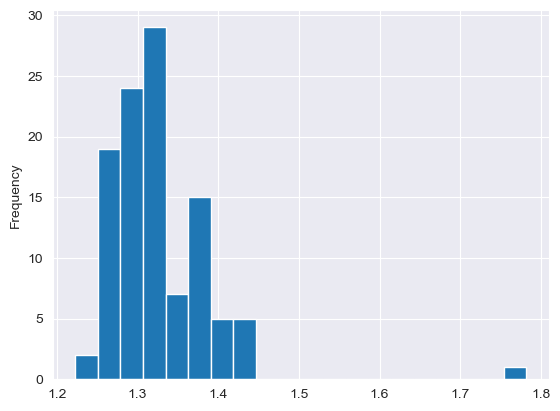

In [31]:
temp  = df_clean.loc[(df_clean.Model == '1-23-mixed-girg')]
(temp.alpha > 99).values.sum()
temp.loc[(df_clean.alpha < 99)].alpha.plot(kind="hist", bins=20)


In [37]:
df_clean.loc[df_clean.Model.isin(['1d-girg', '1-2-34-mixed-girg', '12-34-mixed-girg', 'real-world']), ['Graph', 'Model', 'Type', 'Nodes', 'Edges', 'alpha', 'Centrality.ClusteringCoefficient.Location.Arithmetic Mean', 'Centrality.Degree.Location.Arithmetic Mean']].sort_values(['Graph', 'Model'])

,Graph,Model,Type,Nodes,Edges,alpha,Centrality.ClusteringCoefficient.Location.Arithmetic Mean,Centrality.Degree.Location.Arithmetic Mean
847,socfb-American75,1-2-34-mixed-girg,socfb,6370,217945,1.912160,0.238988,68.428571
849,socfb-American75,12-34-mixed-girg,socfb,6370,217022,2.361624,0.243418,68.138776
831,socfb-American75,1d-girg,socfb,6370,217845,1.295678,0.240732,68.397174
825,socfb-American75,real-world,socfb,6370,217654,NaN,0.240782,68.337206
997,socfb-Amherst41,1-2-34-mixed-girg,socfb,2235,90826,2.649007,0.312519,81.276063
...,...,...,...,...,...,...,...,...
1275,socfb-Wisconsin87,real-world,socfb,23831,835946,NaN,0.210350,70.156183
2597,socfb-Yale4,1-2-34-mixed-girg,socfb,8561,405977,1.912160,0.236205,94.843359
2599,socfb-Yale4,12-34-mixed-girg,socfb,8561,403848,2.340464,0.235274,94.345988
2581,socfb-Yale4,1d-girg,socfb,8561,405578,1.295678,0.235691,94.750146


In [41]:
df_clean.iloc[847].Info

df_clean.iloc[831].Info

{'tau': 4.849201442177161,
 'alpha': 1.9121601434120108,
 'const': 1.508661888501632,
 'target_lcc': 0.24078233340981425,
 'fit_lcc': 0.23898759594034413,
 'fitting_time': 289.3942127227783,
 'hist': [(2.0, 0.24929506185762043),
  (1.342281879194631, 0.13593159528007298),
  (1.6064257028112447, 0.18971435142851725),
  (1.7817371937639197, 0.22068125029615984),
  (1.884570082449941, 0.23477707610600684),
  (1.9405700424499694, 0.24370223329880558),
  (1.9121601434120108, 0.24031726125498953),
  (1.9121601434120108, 0.24031726125498953)]}

{'tau': 4.849201442177161,
 'alpha': 1.2956777001720823,
 'const': 6.7686124446178155,
 'target_lcc': 0.24078233340981425,
 'fit_lcc': 0.24073177279725294,
 'fitting_time': 15.259531736373901,
 'hist': [(2.0, 0.4911367765952871),
  (1.342281879194631, 0.2612019624102894),
  (1.1527377521613833, 0.1745638924551194),
  (1.24031007751938, 0.2159441664349832),
  (1.2892828364222402, 0.23629716812051968),
  (1.3152486642005756, 0.24797011080350312),
  (1.3021363173957274, 0.24482454687487806),
  (1.2956777001720823, 0.24114887846310393)]}

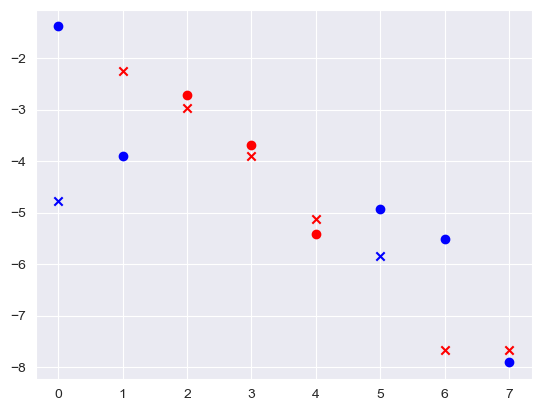

In [72]:
import matplotlib.pyplot as plt
import numpy as np
def plot_hist(info, marker='o'):
    pairs = info['hist']
    target = info['target_lcc']
    ys = np.array([target - x[1] for x in pairs])
    signs = ys > 0
    ys2 = np.log(np.abs(ys))
    for i, y in enumerate(ys2):
        plt.scatter(i, y, color='r' if signs[i] else 'b', marker=marker)
    # plt.plot(ys2, color=['r' if x else 'b' for x in signs], marker='o')

    # plt.axhline(0, color='r', linestyle='--')

plot_hist(df_clean.iloc[847].Info, marker='x')
plot_hist(df_clean.iloc[831].Info, marker='o')

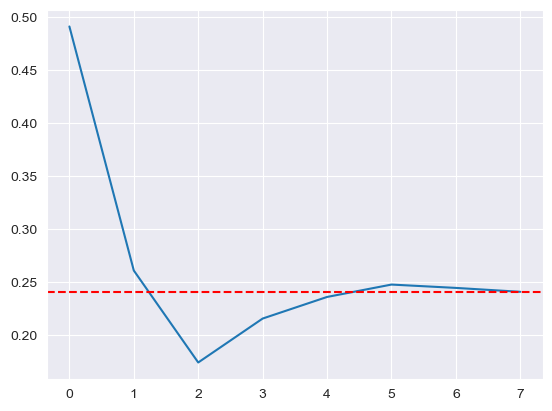

In [56]:
plot_hist(df_clean.iloc[831].Info)

In [5]:
[x for x in df_clean.columns if 'iameter' in x]
[x for x in df_clean.columns if 'PageRank' in x]
df_clean.columns

In [4]:
DP = os.environ['DATA_PATH']
all_df = pd.read_csv(DP + '4-classification_results/accuracies/all.csv').T
# small_deg_df = pd.read_csv(DP + '4-classification_results/accuracies/avg-degree-le-30.csv').T
# large_deg_df = pd.read_csv(DP + '4-classification_results/accuracies/avg-degree-gt-30.csv').T
# socfb_df = pd.read_csv(DP + '4-classification_results/accuracies/socfb.csv').T
# not_socfb_df = pd.read_csv(DP + '4-classification_results/accuracies/not-socfb.csv').T
# for df in [all_df, small_deg_df, large_deg_df, socfb_df, not_socfb_df]:
for df in [all_df]:
    df.columns = df.iloc[0]
    df.drop(df.index[0], inplace=True)
    # df.reset_index(inplace=True)
    df['~features'] = df.index
    # df.drop(columns=['index'], inplace=True)

all_df = all_df.reindex(sorted(all_df.columns), axis=1)

In [5]:
all_df

features,1-2-34-mixed-girg,1-23-mixed-girg,1-234-mixed-girg,12-34-mixed-girg,1d-copyweight-girg,1d-cube-girg,1d-girg,1d-min-girg,2d-copyweight-girg,2d-cube-girg,...,5d-min-girg,6d-girg,7d-girg,BA circle,BA full,ER,chung-lu,chung-lu-tau,hyperbolic,~features
"Betweenness,Closeness,Diameter Max - mean",1.0,1.0,1.0,1.0,0.931373,1.0,1.0,1.0,0.946078,0.995098,...,1.0,1.0,1.0,1.0,1.0,1.0,0.990196,1.0,1.0,"Betweenness,Closeness,Diameter Max - mean"
"Betweenness,Closeness,Diameter Max - median",1.0,1.0,1.0,1.0,0.936275,1.0,1.0,1.0,0.97549,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.990196,1.0,1.0,"Betweenness,Closeness,Diameter Max - median"
"Betweenness,Closeness,Diameter Max - stats",1.0,1.0,1.0,1.0,0.970588,1.0,1.0,1.0,0.985294,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.980392,1.0,1.0,"Betweenness,Closeness,Diameter Max - stats"
"Betweenness,Closeness,Effective Diameter - mean",0.970588,0.892157,0.828431,0.970588,0.720588,0.843137,0.833333,0.833333,0.710784,0.813725,...,0.995098,0.901961,0.872549,0.990196,0.990196,0.990196,0.852941,0.990196,0.857843,"Betweenness,Closeness,Effective Diameter - mean"
"Betweenness,Closeness,Effective Diameter - median",0.980392,0.985294,0.980392,0.980392,0.764706,0.990196,0.985294,0.985294,0.818627,0.990196,...,0.995098,0.990196,0.97549,0.995098,0.995098,0.990196,0.921569,0.990196,0.970588,"Betweenness,Closeness,Effective Diameter - median"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Nodes,Edges,Partition.Communities - stats",0.990196,0.980392,0.980392,0.985294,0.970588,0.941176,0.946078,0.97549,0.955882,0.941176,...,0.990196,0.897059,0.892157,0.965686,0.95098,0.916667,0.906863,0.897059,0.990196,"Nodes,Edges,Partition.Communities - stats"
"Nodes,Edges,Partition.CoreDecomposition - mean",1.0,1.0,1.0,1.0,0.843137,1.0,0.995098,1.0,0.79902,1.0,...,1.0,1.0,1.0,1.0,0.995098,1.0,0.735294,1.0,1.0,"Nodes,Edges,Partition.CoreDecomposition - mean"
"Nodes,Edges,Partition.CoreDecomposition - median",0.995098,0.97549,0.995098,0.995098,0.70098,0.980392,0.990196,0.990196,0.764706,0.960784,...,1.0,1.0,1.0,1.0,1.0,0.995098,0.656863,1.0,0.97549,"Nodes,Edges,Partition.CoreDecomposition - median"
"Nodes,Edges,Partition.CoreDecomposition - stats",1.0,1.0,0.995098,1.0,0.936275,1.0,0.995098,1.0,0.921569,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.833333,1.0,1.0,"Nodes,Edges,Partition.CoreDecomposition - stats"


In [6]:
all_df.sort_values('features', key=lambda x: x[::-1]).loc['Nodes,Edges,ClusteringCoefficient - mean']

KeyError: 'features'

In [7]:
all_df.loc[all_df['~features'].str.contains("iameter")]

features,1-2-34-mixed-girg,1-23-mixed-girg,1-234-mixed-girg,12-34-mixed-girg,1d-copyweight-girg,1d-cube-girg,1d-girg,1d-min-girg,2d-copyweight-girg,2d-cube-girg,...,5d-min-girg,6d-girg,7d-girg,BA circle,BA full,ER,chung-lu,chung-lu-tau,hyperbolic,~features
"Betweenness,Closeness,Diameter Max - mean",1.0,1.0,1.0,1.0,0.931373,1.0,1.0,1.0,0.946078,0.995098,...,1.0,1.0,1.0,1.0,1.0,1.0,0.990196,1.0,1.0,"Betweenness,Closeness,Diameter Max - mean"
"Betweenness,Closeness,Diameter Max - median",1.0,1.0,1.0,1.0,0.936275,1.0,1.0,1.0,0.97549,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.990196,1.0,1.0,"Betweenness,Closeness,Diameter Max - median"
"Betweenness,Closeness,Diameter Max - stats",1.0,1.0,1.0,1.0,0.970588,1.0,1.0,1.0,0.985294,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.980392,1.0,1.0,"Betweenness,Closeness,Diameter Max - stats"
"Betweenness,Closeness,Effective Diameter - mean",0.970588,0.892157,0.828431,0.970588,0.720588,0.843137,0.833333,0.833333,0.710784,0.813725,...,0.995098,0.901961,0.872549,0.990196,0.990196,0.990196,0.852941,0.990196,0.857843,"Betweenness,Closeness,Effective Diameter - mean"
"Betweenness,Closeness,Effective Diameter - median",0.980392,0.985294,0.980392,0.980392,0.764706,0.990196,0.985294,0.985294,0.818627,0.990196,...,0.995098,0.990196,0.97549,0.995098,0.995098,0.990196,0.921569,0.990196,0.970588,"Betweenness,Closeness,Effective Diameter - median"
"Betweenness,Closeness,Effective Diameter - stats",0.990196,0.995098,0.985294,1.0,0.946078,0.990196,0.990196,0.985294,0.946078,1.0,...,0.995098,0.995098,0.985294,1.0,1.0,1.0,0.955882,1.0,0.995098,"Betweenness,Closeness,Effective Diameter - stats"
"ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Diameter Max - mean",1.0,1.0,1.0,1.0,0.936275,1.0,1.0,1.0,0.916667,0.995098,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"ClusteringCoefficient,Degree Distribution.Powe..."
"ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Diameter Max - mean+std",1.0,1.0,1.0,1.0,0.980392,1.0,1.0,1.0,0.960784,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"ClusteringCoefficient,Degree Distribution.Powe..."
"ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Diameter Max - median",1.0,1.0,1.0,1.0,0.960784,1.0,1.0,1.0,0.936275,0.995098,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"ClusteringCoefficient,Degree Distribution.Powe..."
"ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Diameter Max - stats",1.0,1.0,1.0,1.0,0.980392,1.0,1.0,1.0,0.97549,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"ClusteringCoefficient,Degree Distribution.Powe..."


In [9]:
all_df.loc[all_df['~features'].str.contains("stats")]

features,1-2-34-mixed-girg,1-23-mixed-girg,1-234-mixed-girg,12-34-mixed-girg,1d-copyweight-girg,1d-cube-girg,1d-girg,1d-min-girg,2d-copyweight-girg,2d-cube-girg,...,5d-girg,5d-min-girg,6d-girg,7d-girg,BA circle,BA full,ER,chung-lu,hyperbolic,~features
"Betweenness,Closeness,Diameter Max - stats",1.0,1.0,1.0,1.0,0.975962,1.0,1.0,1.0,0.985577,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.980769,1.0,"Betweenness,Closeness,Diameter Max - stats"
"Betweenness,Closeness,Effective Diameter - stats",0.990385,0.995192,0.985577,1.0,0.927885,0.990385,0.990385,0.985577,0.947115,1.0,...,0.995192,0.995192,0.995192,0.985577,1.0,1.0,1.0,0.956731,0.995192,"Betweenness,Closeness,Effective Diameter - stats"
"ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Diameter Max - stats",1.0,1.0,1.0,1.0,0.980769,1.0,1.0,1.0,0.980769,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"ClusteringCoefficient,Degree Distribution.Powe..."
"ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Effective Diameter - stats",1.0,1.0,1.0,1.0,0.942308,1.0,1.0,1.0,0.899038,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"ClusteringCoefficient,Degree Distribution.Powe..."
"Nodes,Edges,Betweenness - stats",0.985577,0.990385,0.990385,0.995192,0.8125,0.985577,0.985577,0.990385,0.841346,1.0,...,0.995192,0.995192,1.0,0.985577,1.0,1.0,1.0,0.951923,0.985577,"Nodes,Edges,Betweenness - stats"
"Nodes,Edges,Betweenness,Closeness,Diameter Max - stats",1.0,1.0,1.0,1.0,0.971154,1.0,1.0,1.0,0.975962,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.980769,1.0,"Nodes,Edges,Betweenness,Closeness,Diameter Max..."
"Nodes,Edges,Betweenness,Closeness,Effective Diameter - stats",0.995192,0.980769,0.990385,1.0,0.923077,0.990385,0.985577,0.985577,0.9375,1.0,...,0.995192,0.995192,1.0,0.985577,1.0,1.0,1.0,0.961538,0.995192,"Nodes,Edges,Betweenness,Closeness,Effective Di..."
"Nodes,Edges,Centrality.CoreDecomposition - stats",1.0,1.0,1.0,1.0,0.932692,1.0,1.0,1.0,0.913462,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.850962,1.0,"Nodes,Edges,Centrality.CoreDecomposition - stats"
"Nodes,Edges,Centrality.CoreDecomposition,ClusteringCoefficient - stats",1.0,1.0,1.0,1.0,0.966346,1.0,1.0,1.0,0.942308,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,"Nodes,Edges,Centrality.CoreDecomposition,Clust..."
"Nodes,Edges,Centrality.CoreDecomposition,Degree - stats",1.0,1.0,1.0,1.0,0.990385,1.0,1.0,1.0,0.990385,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.985577,1.0,"Nodes,Edges,Centrality.CoreDecomposition,Degre..."


In [10]:
foo = all_df.loc[all_df['~features'].str.contains("stats")]
foo.to_csv('temp.csv', index=False)

In [11]:
with open('temp.txt', 'w') as file:
    file.write('\n'.join(foo.index))

1807

In [26]:
all_df.loc['Nodes,Edges,ClusteringCoefficient - median']

Index(['1-2-34-mixed-girg', '1-23-mixed-girg', '1-234-mixed-girg',
       '12-34-mixed-girg', '1d-cube-girg', '1d-girg', '1d-min-girg',
       '2d-cube-girg', '2d-girg', '2d-min-girg', '3d-cube-girg', '3d-girg',
       '3d-min-girg', '4d-girg', '4d-min-girg', '5d-girg', '5d-min-girg',
       '6d-girg', '7d-girg', 'BA circle', 'BA full', 'ER', 'chung-lu',
       'hyperbolic', 'features'],
      dtype='object', name='features')

In [6]:
all_df.loc[:,  ['1d-girg', '2d-girg', '3d-girg', '1d-min-girg', '2d-min-girg', '3d-min-girg']]

features,1d-girg,2d-girg,3d-girg,1d-min-girg,2d-min-girg,3d-min-girg
"Betweenness,Closeness,Diameter Max - mean",1.0,1.0,1.0,1.0,1.0,1.0
"Betweenness,Closeness,Diameter Max - median",1.0,1.0,1.0,1.0,1.0,1.0
"Betweenness,Closeness,Diameter Max - stats",1.0,1.0,1.0,1.0,1.0,1.0
"Betweenness,Closeness,Effective Diameter - mean",0.82243,0.836449,0.85514,0.831776,0.962617,0.96729
"Betweenness,Closeness,Effective Diameter - median",0.976636,0.981308,0.981308,0.981308,0.985981,0.981308
...,...,...,...,...,...,...
"Nodes,Edges,Partition.Communities - stats",0.953271,0.957944,0.971963,0.976636,0.985981,0.985981
"Nodes,Edges,Partition.CoreDecomposition - mean",0.995327,1.0,1.0,1.0,1.0,1.0
"Nodes,Edges,Partition.CoreDecomposition - median",0.990654,0.995327,0.985981,0.990654,0.990654,0.995327
"Nodes,Edges,Partition.CoreDecomposition - stats",0.995327,1.0,1.0,1.0,1.0,1.0


In [7]:
all_df.loc[indices,  ['1d-girg', '2d-girg', '3d-girg', '4d-girg', '5d-girg', '6d-girg', '7d-girg']]

NameError: name 'indices' is not defined

In [8]:
all_df.columns

Index(['1-2-34-mixed-girg', '1-23-mixed-girg', '1-234-mixed-girg',
       '12-34-mixed-girg', '1d-copyweight-girg', '1d-cube-girg', '1d-girg',
       '1d-min-girg', '2d-copyweight-girg', '2d-cube-girg', '2d-girg',
       '2d-min-girg', '3d-copyweight-girg', '3d-cube-girg', '3d-girg',
       '3d-min-girg', '4d-copyweight-girg', '4d-girg', '4d-min-girg',
       '5d-copyweight-girg', '5d-girg', '5d-min-girg', '6d-girg', '7d-girg',
       'BA circle', 'BA full', 'ER', 'chung-lu', 'chung-lu-tau', 'hyperbolic',
       '~features'],
      dtype='object', name='features')

In [12]:
indices = """Betweenness,Closeness,Effective Diameter - mean
ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Effective Diameter - mean
ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Effective Diameter - median
Nodes,Edges,Betweenness - mean
Nodes,Edges,Betweenness - median
Nodes,Edges,Betweenness,Closeness,Effective Diameter - mean
Nodes,Edges,Closeness - mean
Nodes,Edges,Closeness - median
Nodes,Edges,Closeness,ClusteringCoefficient - mean
Nodes,Edges,Closeness,ClusteringCoefficient - median
Nodes,Edges,Closeness,Degree - mean
Nodes,Edges,ClusteringCoefficient - mean
Nodes,Edges,ClusteringCoefficient - median
Nodes,Edges,ClusteringCoefficient,Betweenness - mean
Nodes,Edges,ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha - mean
Nodes,Edges,ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Effective Diameter - mean
Nodes,Edges,ClusteringCoefficient,Effective Diameter - mean
Nodes,Edges,Degree Distribution.Powerlaw.Alpha - mean
Nodes,Edges,Degree,Betweenness - mean
Nodes,Edges,Effective Diameter - mean
Nodes,Edges,Katz - mean
Nodes,Edges,PageRank - mean
Nodes,Edges,PageRank - median
Nodes,Edges,Partition.Communities - mean
Nodes,Edges,Partition.Communities - median
Nodes,Edges,Centrality.CoreDecomposition - mean
Nodes,Edges,Centrality.CoreDecomposition - median
Nodes,Edges,Katz - median"""
indices = indices.split('\n')

# all_df.loc[indices, ['1d-girg', '2d-girg', '3d-girg', '4d-girg', '5d-girg', '6d-girg', '7d-girg', '1d-cube-girg', '2d-cube-girg', '3d-cube-girg']]

indices = """Nodes,Edges,Betweenness - stats
Nodes,Edges,Centrality.CoreDecomposition - stats
Nodes,Edges,Closeness - stats
Nodes,Edges,ClusteringCoefficient - stats
Nodes,Edges,Degree - stats
Nodes,Edges,Katz - stats
Nodes,Edges,PageRank - stats
Nodes,Edges,Partition.Communities - stats
Nodes,Edges,Partition.CoreDecomposition - stats
Nodes,Edges,Diameter Max - mean
Nodes,Edges,Effective Diameter - mean"""
indices = indices.split('\n')

columns = """1d-copyweight-girg	2d-copyweight-girg	3d-copyweight-girg	4d-copyweight-girg	5d-copyweight-girg	chung-lu	1-2-34-mixed-girg	1-23-mixed-girg	1-234-mixed-girg	12-34-mixed-girg	1d-min-girg	2d-min-girg	3d-min-girg	4d-min-girg	5d-min-girg	1d-cube-girg	2d-cube-girg	3d-cube-girg 1d-girg	2d-girg	3d-girg	4d-girg	5d-girg	6d-girg	7d-girg	chung-lu-tau BA_circle	BA_full	ER	hyperbolic"""
columns = columns.split()
columns[-4] = 'BA circle'
columns[-3] = 'BA full'

all_df.loc[indices, columns].to_csv('temp.csv', index=False)

In [10]:
os.getcwd()

'/cluster/home/bdayan/girgs/benji_src/notebooks'

In [12]:
all_df.loc[indices, ['1d-min-girg', '2d-min-girg', '3d-min-girg', '4d-min-girg', '5d-min-girg', '1-23-mixed-girg', '1-2-34-mixed-girg', '12-34-mixed-girg', '1-234-mixed-girg']].to_csv('temp.csv', index=False)

In [18]:
columns = """1d-copyweight-girg	2d-copyweight-girg	3d-copyweight-girg	4d-copyweight-girg	5d-copyweight-girg	chung-lu	1-2-34-mixed-girg	1-23-mixed-girg	1-234-mixed-girg	12-34-mixed-girg	1d-min-girg	2d-min-girg	3d-min-girg	4d-min-girg	5d-min-girg	1d-cube-girg	2d-cube-girg	3d-cube-girg	1d-girg	2d-girg	3d-girg	4d-girg	5d-girg	6d-girg	7d-girg	BA circle	BA full	ER	hyperbolic"""

columns.split()

['1d-copyweight-girg',
 '2d-copyweight-girg',
 '3d-copyweight-girg',
 '4d-copyweight-girg',
 '5d-copyweight-girg',
 'chung-lu',
 '1-2-34-mixed-girg',
 '1-23-mixed-girg',
 '1-234-mixed-girg',
 '12-34-mixed-girg',
 '1d-min-girg',
 '2d-min-girg',
 '3d-min-girg',
 '4d-min-girg',
 '5d-min-girg',
 '1d-cube-girg',
 '2d-cube-girg',
 '3d-cube-girg',
 '1d-girg',
 '2d-girg',
 '3d-girg',
 '4d-girg',
 '5d-girg',
 '6d-girg',
 '7d-girg',
 'BA',
 'circle',
 'BA',
 'full',
 'ER',
 'hyperbolic']

In [22]:
print('\n'.join(indices))

Nodes,Edges,Betweenness - stats
Nodes,Edges,Centrality.CoreDecomposition - stats
Nodes,Edges,Closeness - stats
Nodes,Edges,Degree - stats
Nodes,Edges,Katz - stats
Nodes,Edges,PageRank - stats
Nodes,Edges,Partition.Communities - stats
Nodes,Edges,Partition.CoreDecomposition - stats
Nodes,Edges,Diameter Max - mean
Nodes,Edges,Effective Diameter - mean


In [238]:
all_df.loc[:,  ['1d-girg', '2d-girg', '3d-girg',  '4d-girg', '5d-girg']]

features,1d-girg,2d-girg,3d-girg,4d-girg,5d-girg
"Betweenness,Closeness,Diameter Max - mean",0.986364,0.986364,0.986364,0.986364,0.986364
"Betweenness,Closeness,Diameter Max - median",0.986364,0.986364,0.990909,0.986364,0.986364
"Betweenness,Closeness,Diameter Max - stats",0.995455,0.995455,0.995455,0.995455,0.986364
"Betweenness,Closeness,Effective Diameter - mean",0.818182,0.831818,0.854545,0.868182,0.890909
"Betweenness,Closeness,Effective Diameter - median",0.977273,0.977273,0.972727,0.968182,0.968182
...,...,...,...,...,...
"Nodes,Edges,Partition.Communities - stats",0.95,0.954545,0.968182,0.945455,0.922727
"Nodes,Edges,Partition.CoreDecomposition - mean",0.990909,0.995455,0.995455,0.995455,0.995455
"Nodes,Edges,Partition.CoreDecomposition - median",0.981818,0.986364,0.981818,0.981818,0.986364
"Nodes,Edges,Partition.CoreDecomposition - stats",0.995455,1.0,1.0,1.0,1.0


In [220]:
all_df.features

0              Betweenness,Closeness,Diameter Max - mean
1            Betweenness,Closeness,Diameter Max - median
2             Betweenness,Closeness,Diameter Max - stats
3        Betweenness,Closeness,Effective Diameter - mean
4      Betweenness,Closeness,Effective Diameter - median
                             ...                        
110            Nodes,Edges,Partition.Communities - stats
111       Nodes,Edges,Partition.CoreDecomposition - mean
112     Nodes,Edges,Partition.CoreDecomposition - median
113      Nodes,Edges,Partition.CoreDecomposition - stats
114                                   all (uncorrelated)
Name: features, Length: 115, dtype: object

In [23]:
import re
all_df.features.apply(lambda x: re.match('^Betweenness.*', x) is not None)

features,1d-girg,2d-girg,3d-girg,4d-girg,5d-girg,6d-girg,7d-girg,1d-cube-girg,2d-cube-girg,3d-cube-girg
"Betweenness,Closeness,Effective Diameter - mean",0.82243,0.836449,0.85514,0.859813,0.869159,0.883178,0.85514,0.85514,0.808411,0.780374
"ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Effective Diameter - mean",0.813084,0.817757,0.799065,0.799065,0.827103,0.981308,1.0,0.785047,0.761682,0.752336
"ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Effective Diameter - median",0.864486,0.869159,0.85514,0.859813,0.836449,0.920561,0.990654,0.841121,0.780374,0.803738
"Nodes,Edges,Betweenness - mean",0.598131,0.640187,0.630841,0.654206,0.728972,0.752336,0.742991,0.654206,0.682243,0.775701
"Nodes,Edges,Betweenness - median",0.976636,0.981308,0.981308,0.962617,0.953271,0.943925,0.915888,0.976636,0.985981,0.995327
"Nodes,Edges,Betweenness,Closeness,Effective Diameter - mean",0.831776,0.85514,0.85514,0.859813,0.897196,0.901869,0.864486,0.859813,0.836449,0.817757
"Nodes,Edges,Closeness - mean",0.682243,0.71028,0.719626,0.813084,0.864486,0.766355,0.584112,0.771028,0.827103,0.82243
"Nodes,Edges,Closeness - median",0.714953,0.794393,0.794393,0.85514,0.845794,0.813084,0.616822,0.785047,0.85514,0.859813
"Nodes,Edges,Closeness,ClusteringCoefficient - mean",0.668224,0.700935,0.705607,0.785047,0.85514,0.981308,1.0,0.728972,0.794393,0.803738
"Nodes,Edges,Closeness,ClusteringCoefficient - median",0.873832,0.883178,0.892523,0.897196,0.88785,0.915888,0.990654,0.859813,0.845794,0.859813


In [24]:
pret, postt = '1d-girg', '4d-girg'
comp_df = all_df
pre, post = comp_df.loc[:, pret].to_numpy(), comp_df.loc[:, postt].to_numpy()
fig = sns.swarmplot(post - pre).set_title(f'{postt} post - {pret} pre')
scipy.stats.ttest_rel(pre, post, alternative="greater")

features,1d-min-girg,2d-min-girg,3d-min-girg,4d-min-girg,5d-min-girg,1-23-mixed-girg,1-2-34-mixed-girg,12-34-mixed-girg,1-234-mixed-girg
"Betweenness,Closeness,Effective Diameter - mean",0.831776,0.962617,0.96729,0.976636,0.981308,0.873832,0.957944,0.953271,0.827103
"ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Effective Diameter - mean",0.803738,0.948598,0.96729,0.990654,1.0,0.817757,0.939252,0.948598,0.799065
"ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Effective Diameter - median",0.85514,0.943925,0.971963,0.995327,1.0,0.841121,0.948598,0.957944,0.841121
"Nodes,Edges,Betweenness - mean",0.616822,0.845794,0.88785,0.897196,0.934579,0.649533,0.831776,0.841121,0.621495
"Nodes,Edges,Betweenness - median",0.976636,0.911215,0.925234,0.911215,0.901869,0.971963,0.911215,0.925234,0.976636
"Nodes,Edges,Betweenness,Closeness,Effective Diameter - mean",0.841121,0.96729,0.981308,0.981308,0.990654,0.892523,0.971963,0.96729,0.831776
"Nodes,Edges,Closeness - mean",0.654206,0.654206,0.82243,0.845794,0.883178,0.556075,0.682243,0.67757,0.616822
"Nodes,Edges,Closeness - median",0.738318,0.570093,0.635514,0.71028,0.747664,0.654206,0.588785,0.588785,0.728972
"Nodes,Edges,Closeness,ClusteringCoefficient - mean",0.663551,0.621495,0.719626,0.948598,1.0,0.518692,0.668224,0.607477,0.626168
"Nodes,Edges,Closeness,ClusteringCoefficient - median",0.864486,0.88785,0.901869,0.88785,0.906542,0.873832,0.897196,0.901869,0.864486


In [189]:
import numpy as np

In [28]:
dftemp = socfb_df.loc[:, ['1d-girg', '2d-girg', '3d-girg',  '1d-cube-girg', '2d-cube-girg']]
mean =  dftemp.mean(axis=1)
for column in dftemp.columns:
    dftemp[column + '_norm'] = dftemp[column] - mean

features,BA circle,BA full,ER,chung-lu,hyperbolic
"Betweenness,Closeness,Effective Diameter - mean",0.990654,0.990654,0.985981,0.841121,0.859813
"ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Effective Diameter - mean",1.0,1.0,1.0,0.995327,0.808411
"ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Effective Diameter - median",1.0,1.0,1.0,0.995327,0.864486
"Nodes,Edges,Betweenness - mean",0.976636,0.976636,0.957944,0.897196,0.672897
"Nodes,Edges,Betweenness - median",0.953271,0.971963,0.925234,0.925234,0.957944
"Nodes,Edges,Betweenness,Closeness,Effective Diameter - mean",0.995327,0.995327,0.985981,0.901869,0.878505
"Nodes,Edges,Closeness - mean",0.957944,0.957944,0.892523,0.901869,0.850467
"Nodes,Edges,Closeness - median",0.920561,0.925234,0.813084,0.85514,0.850467
"Nodes,Edges,Closeness,ClusteringCoefficient - mean",1.0,1.0,1.0,1.0,0.766355
"Nodes,Edges,Closeness,ClusteringCoefficient - median",1.0,1.0,1.0,1.0,0.920561


In [27]:
norms_df = dftemp.iloc[:, 5:]
outliers = dftemp.loc[norms_df.min(axis=1) - norms_df.median(axis=1) < -0.05, ['1d-girg', '2d-girg', '3d-girg',  '1d-cube-girg', '2d-cube-girg']]
outliers2 = outliers.apply(lambda row: np.argsort(row), axis=1)
outliers

Index(['1-2-34-mixed-girg', '1-23-mixed-girg', '1-234-mixed-girg',
       '12-34-mixed-girg', '1d-cube-girg', '1d-girg', '1d-min-girg',
       '2d-cube-girg', '2d-girg', '2d-min-girg', '3d-cube-girg', '3d-girg',
       '3d-min-girg', '4d-girg', '4d-min-girg', '5d-girg', '5d-min-girg',
       '6d-girg', '7d-girg', 'BA circle', 'BA full', 'ER', 'chung-lu',
       'hyperbolic', 'features'],
      dtype='object', name='features')

In [130]:
norms_df = dftemp.iloc[:, 5:]
outliers = dftemp.loc[norms_df.min(axis=1) - norms_df.mean(axis=1) < -0.05, ['1d-girg', '2d-girg', '3d-girg',  '1d-cube-girg', '2d-cube-girg']]
outliers2 = outliers.apply(lambda row: np.argsort(row), axis=1)
outliers

features,1d-girg,2d-girg,3d-girg,1d-cube-girg,2d-cube-girg
"ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Effective Diameter - median",0.868182,0.868182,0.854545,0.840909,0.790909
"Nodes,Edges,Centrality.CoreDecomposition - median",0.790909,0.804545,0.822727,0.8,0.736364
"Nodes,Edges,Closeness - mean",0.672727,0.727273,0.718182,0.709091,0.831818
"Nodes,Edges,Closeness,ClusteringCoefficient - mean",0.663636,0.709091,0.731818,0.718182,0.781818
"Nodes,Edges,Closeness,Degree - mean",0.640909,0.672727,0.704545,0.7,0.813636
"Nodes,Edges,ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha - mean",0.636364,0.640909,0.590909,0.659091,0.681818
"Nodes,Edges,ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Effective Diameter - median",0.922727,0.909091,0.918182,0.904545,0.85
"Nodes,Edges,Degree Distribution.Powerlaw.Alpha - mean",0.663636,0.631818,0.590909,0.672727,0.7
"Nodes,Edges,Effective Diameter - mean",0.822727,0.831818,0.818182,0.822727,0.759091


In [123]:
outliers

features,1d-girg,2d-girg,3d-girg,1d-cube-girg,2d-cube-girg
"ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Effective Diameter - mean",0.818182,0.795455,0.804545,0.772727,0.740909
"ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Effective Diameter - median",0.868182,0.868182,0.854545,0.840909,0.790909
"Nodes,Edges,Centrality.CoreDecomposition - median",0.790909,0.804545,0.822727,0.8,0.736364
"Nodes,Edges,Centrality.CoreDecomposition,ClusteringCoefficient - mean",0.954545,0.95,0.954545,0.95,0.895455
"Nodes,Edges,Centrality.CoreDecomposition,ClusteringCoefficient - median",0.931818,0.918182,0.931818,0.904545,0.863636
"Nodes,Edges,Closeness - mean",0.672727,0.727273,0.718182,0.709091,0.831818
"Nodes,Edges,Closeness - median",0.745455,0.8,0.8,0.781818,0.827273
"Nodes,Edges,Closeness,ClusteringCoefficient - mean",0.663636,0.709091,0.731818,0.718182,0.781818
"Nodes,Edges,Closeness,Degree - mean",0.640909,0.672727,0.704545,0.7,0.813636
"Nodes,Edges,ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha - mean",0.636364,0.640909,0.590909,0.659091,0.681818


In [113]:
norms_df.max(axis=1)

Betweenness,Closeness,Diameter Max - mean            1.818182e-03
Betweenness,Closeness,Diameter Max - median          9.090909e-04
Betweenness,Closeness,Diameter Max - stats           2.727273e-03
Betweenness,Closeness,Effective Diameter - mean      3.090909e-02
Betweenness,Closeness,Effective Diameter - median    5.454545e-03
                                                         ...     
Nodes,Edges,Partition.Communities - stats            1.000000e-02
Nodes,Edges,Partition.CoreDecomposition - mean      -1.110223e-16
Nodes,Edges,Partition.CoreDecomposition - median     6.363636e-03
Nodes,Edges,Partition.CoreDecomposition - stats      9.090909e-04
all (uncorrelated)                                  -1.110223e-16
Length: 115, dtype: float64

In [103]:
def trim_df(df):


Betweenness,Closeness,Diameter Max - mean            0.991364
Betweenness,Closeness,Diameter Max - median          0.991364
Betweenness,Closeness,Diameter Max - stats           0.992727
Betweenness,Closeness,Effective Diameter - mean      0.880455
Betweenness,Closeness,Effective Diameter - median    0.966818
                                                       ...   
Nodes,Edges,Partition.Communities - stats            0.955000
Nodes,Edges,Partition.CoreDecomposition - mean       0.968182
Nodes,Edges,Partition.CoreDecomposition - median     0.956364
Nodes,Edges,Partition.CoreDecomposition - stats      0.981364
all (uncorrelated)                                   0.995909
Length: 115, dtype: float64

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


TtestResult(statistic=-1.4277409937047512, pvalue=0.9219499491804374, df=114)

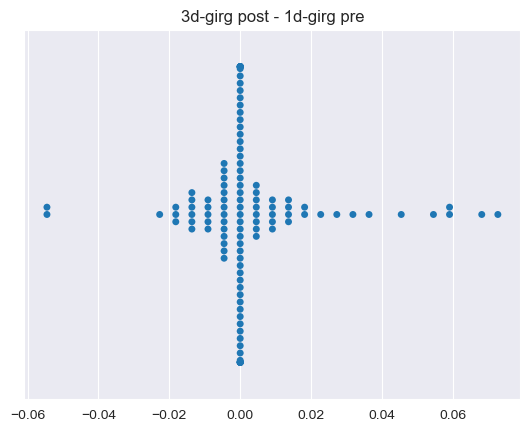

In [144]:
pret, postt = '1d-girg', '3d-girg'
comp_df = socfb_df
pre, post = comp_df.loc[:, pret].to_numpy(), comp_df.loc[:, postt].to_numpy()
fig = sns.swarmplot(post - pre).set_title(f'{postt} post - {pret} pre')
scipy.stats.ttest_rel(pre, post, alternative="greater")

In [37]:
DP

'../../FeatureExtractionOutCube/'

In [41]:
DP_old = '../../FeatureExtractionOutLCCMini3/'
all_df_old = pd.read_csv(DP_old + '4-classification_results/accuracies/all.csv').T

all_df_old.columns = all_df_old.iloc[0]
all_df_old.drop(all_df_old.index[0], inplace=True)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TtestResult(statistic=-2.390187431058854, pvalue=0.9907604971942187, df=114)

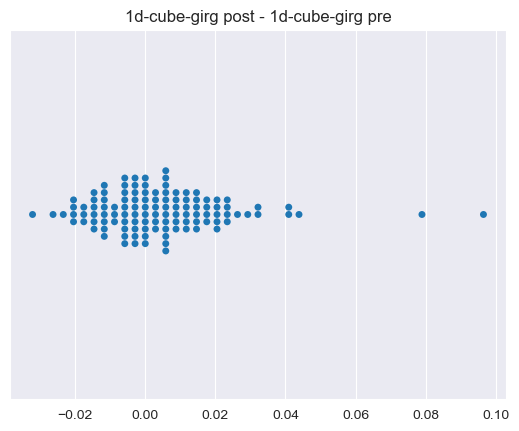

In [49]:
pret, postt = '1d-cube-girg', '1d-cube-girg'
pre, post = all_df_old.loc[:, pret].to_numpy(), all_df.loc[:, postt].to_numpy()
fig = sns.swarmplot(post - pre).set_title(f'{postt} post - {pret} pre')
scipy.stats.ttest_rel(pre, post, alternative="greater")

TtestResult(statistic=1.1296798496949787, pvalue=0.13049126743761563, df=114)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

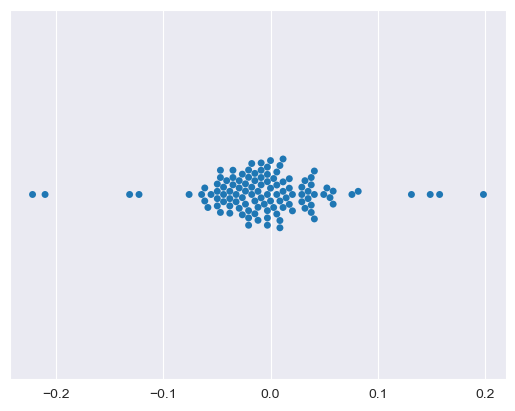

In [24]:
pre, post = all_df.loc[:, 'hyperbolic'].to_numpy(), all_df.loc[:, '2d-girg'].to_numpy()
scipy.stats.ttest_rel(pre, post, alternative="greater")
sns.swarmplot(post - pre)


TtestResult(statistic=-1.8450211297955312, pvalue=0.9661849931468325, df=114)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

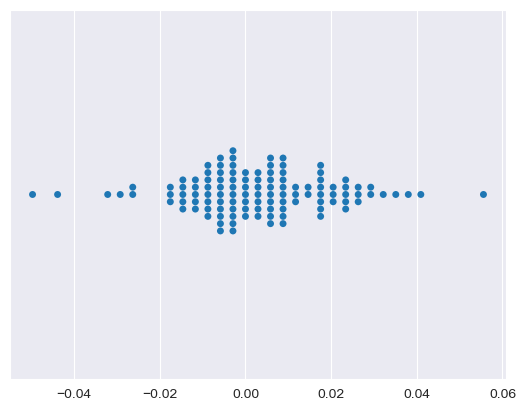

In [27]:
pre, post = all_df.loc[:, '1d-girg'].to_numpy(), all_df.loc[:, '3d-girg'].to_numpy()
scipy.stats.ttest_rel(pre, post, alternative="greater")
sns.swarmplot(post - pre)


TtestResult(statistic=-0.6028799584746598, pvalue=0.726106984847162, df=114)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

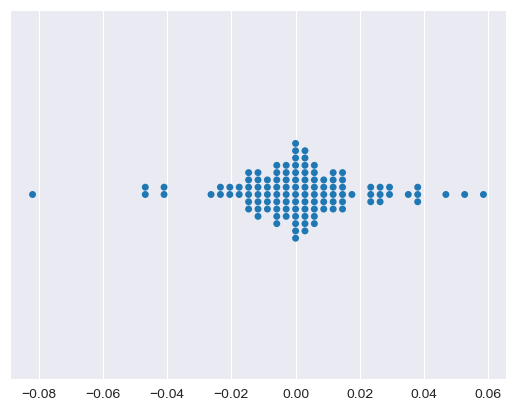

In [26]:
pre, post = all_df.loc[:, '1d-girg'].to_numpy(), all_df.loc[:, '1d-cube-girg'].to_numpy()
scipy.stats.ttest_rel(pre, post, alternative="greater")
sns.swarmplot(post - pre)


TtestResult(statistic=-1.0937221104264812, pvalue=0.8618087258200979, df=114)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

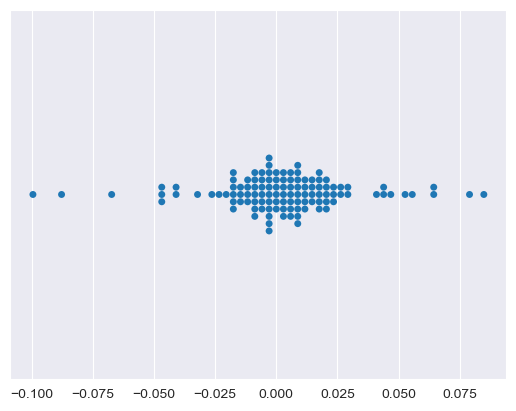

In [28]:
pre, post = all_df.loc[:, '2d-girg'].to_numpy(), all_df.loc[:, '2d-cube-girg'].to_numpy()
scipy.stats.ttest_rel(pre, post, alternative="greater")
sns.swarmplot(post - pre)


TtestResult(statistic=-2.961915518981285, pvalue=0.9981393088533485, df=114)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

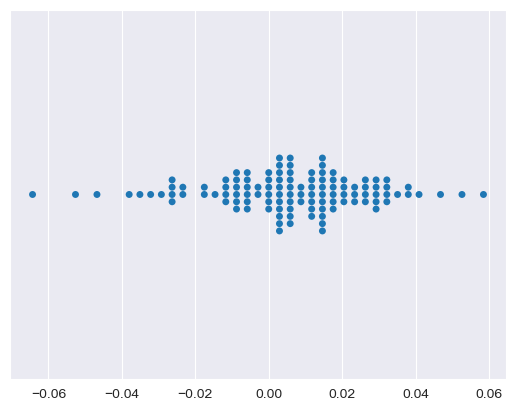

In [23]:
pre, post = all_df.loc[:, '1d-cube-girg'].to_numpy(), all_df.loc[:, '2d-cube-girg'].to_numpy()
scipy.stats.ttest_rel(pre, post, alternative="greater")
sns.swarmplot(post - pre)


TtestResult(statistic=1.1239673038967637, pvalue=0.13169405196590808, df=114)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

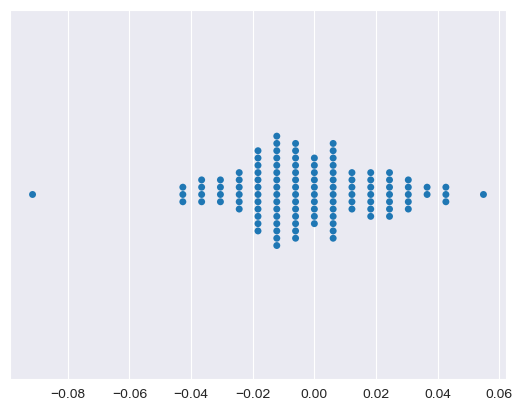

In [19]:
pre, post = all_df.loc[:, '1d-girg'].to_numpy(), all_df.loc[:, '2d-girg'].to_numpy()
scipy.stats.ttest_rel(pre, post, alternative="greater")
sns.swarmplot(post - pre)


TtestResult(statistic=0.40228332380092463, pvalue=0.3441144065933724, df=114)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

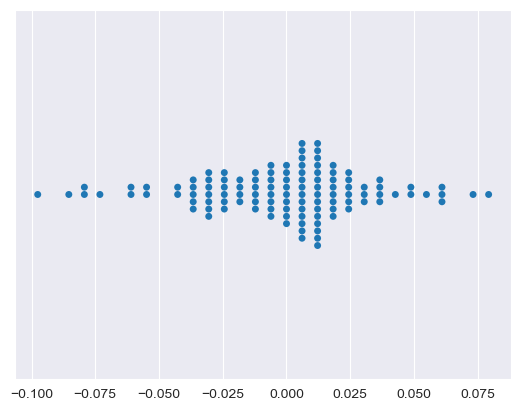

In [20]:
pre, post = all_df.loc[:, '2d-girg'].to_numpy(), all_df.loc[:, '2d-cube-girg'].to_numpy()
scipy.stats.ttest_rel(pre, post, alternative="greater")
sns.swarmplot(post - pre)


In [27]:
socfb_df.loc[socfb_df.hyperbolic < 0.9, ['ER', 'hyperbolic', '1d-girg', '2d-girg', '3d-girg']]

features,ER,hyperbolic,1d-girg,2d-girg,3d-girg
"Betweenness,Closeness,Effective Diameter - mean",0.963636,0.863636,0.813636,0.831818,0.827273
"ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Effective Diameter - mean",1.0,0.795455,0.786364,0.804545,0.813636
"ClusteringCoefficient,Degree Distribution.Powerlaw.Alpha,Effective Diameter - median",1.0,0.859091,0.872727,0.854545,0.859091
"Nodes,Edges - mean",0.495455,0.55,0.495455,0.495455,0.495455
"Nodes,Edges,Betweenness - mean",0.968182,0.581818,0.668182,0.618182,0.559091
"Nodes,Edges,Betweenness - median",0.927273,0.831818,0.986364,0.977273,0.972727
"Nodes,Edges,Betweenness,Closeness,Effective Diameter - mean",0.986364,0.836364,0.809091,0.809091,0.827273
"Nodes,Edges,Betweenness,Closeness,Effective Diameter - median",0.977273,0.872727,0.981818,0.968182,0.963636
"Nodes,Edges,Centrality.CoreDecomposition - median",0.986364,0.813636,0.790909,0.822727,0.813636
"Nodes,Edges,Closeness - mean",0.886364,0.709091,0.709091,0.695455,0.759091


In [29]:
not_socfb_df.loc[not_socfb_df.hyperbolic < 0.8, ['ER', 'hyperbolic', '1d-girg', '2d-girg', '3d-girg']]

features,ER,hyperbolic,1d-girg,2d-girg,3d-girg
"Betweenness,Closeness,Diameter Max - mean",0.738889,0.566667,0.505556,0.5,0.527778
"Betweenness,Closeness,Diameter Max - median",0.9,0.594444,0.633333,0.622222,0.672222
"Betweenness,Closeness,Diameter Max - stats",0.955556,0.661111,0.661111,0.666667,0.655556
"Betweenness,Closeness,Effective Diameter - mean",0.544444,0.6,0.516667,0.511111,0.522222
"Betweenness,Closeness,Effective Diameter - median",0.866667,0.6,0.638889,0.661111,0.666667
...,...,...,...,...,...
"Nodes,Edges,Partition.Communities - median",0.761111,0.688889,0.722222,0.705556,0.755556
"Nodes,Edges,Partition.Communities - stats",0.855556,0.716667,0.744444,0.727778,0.727778
"Nodes,Edges,Partition.CoreDecomposition - mean",0.833333,0.644444,0.666667,0.666667,0.694444
"Nodes,Edges,Partition.CoreDecomposition - median",0.716667,0.616667,0.65,0.65,0.65
